# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
# create a function to calculate data's ecdf
def ecdf(data):
    """Function returns the ecdf of a 1d array."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

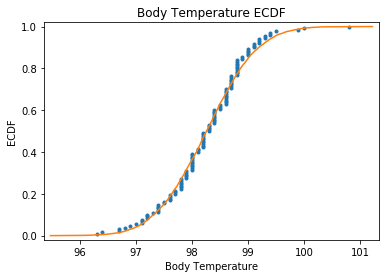

In [5]:
x, y = ecdf(df.temperature)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('ECDF')
_ = plt.title('Body Temperature ECDF')
_ = plt.margins(0.02)

# Create a normal distribution and lay it on top of the ECDF to check if it's a normal distribution.

np.random.seed(123)
body_temp_mean = np.mean(df.temperature)
body_temp_std = np.std(df.temperature)
sample_normal = np.random.normal(body_temp_mean, body_temp_std, size=10000)
x_sample_normal, y_sample_normal = ecdf(sample_normal)

_ = plt.plot(x_sample_normal, y_sample_normal)
_ = plt.margins(0.02)

plt.show()
plt.clf()

In [6]:
len(df.temperature)

# 2. Is the sample size large? Are the observations independent?
# A large dataset is said to be over 30. We have 130 observations in this observation, therefore the sample
# size is considered large. The observations are independent given that the body temperature of one individual
# is not dependent on another persons.

130

### 3. Is the true population mean really 98.6 degrees F?
*   Would you use a one-sample or two-sample test? Why?
*   In this situation, is it appropriate to use the  tt  or  zz  statistic?
*   Now try using the other test. How is the result be different? Why?

In [7]:
# You'd use a one-sample test in this scenario since we're dealing with a single set of observations. Body temperature.
# In this situation it is appropriate to use the t statistic since we do not have the population standard deviation

t, p = stats.ttest_1samp(df.temperature, 98.6)

print('t-score:', t)
print('p-value:', p)

t-score: -5.45482329236
p-value: 2.41063204156e-07


In [8]:
# How is the result different if we use a z-test?

# Define a z-test function
def get_z(data, population):
    """Get the z-score."""
    return (population - np.mean(data)) / np.std(data)

# Since we don't have the population standard deviation, I'll create bootstrap replicate to draw an approximate
# standard deviation for the population

# Define bootstrap replicate functions:
def bs_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw boostrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bs_replicate_1d(data, func)
    return bs_replicates

In [9]:
np.random.seed(123)
sample = draw_bs_reps(df.temperature, np.mean, size=10000)
z = get_z(sample, 98.6)
print('z-score:', z)

# There's not much difference between the t-score and the z-score, leading us to believe that the true
# population mean for body temperature is fact not 98.6F.

z-score: 5.43169010165


### 4. Draw a small sample of size 10 from the data and repeat both tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [10]:
np.random.seed(123)

# Draw a small sample size of ten entries from the original observations.
ten_sample = np.random.choice(df.temperature, size=10)
ten_sample_bs_replicate = draw_bs_reps(ten_sample, np.mean, size=10000)

# Find the t-score and the p-value from the smaller sample size
t_ten, p_ten = stats.ttest_1samp(ten_sample, 98.6)

print('t-score:', t_ten)
print('p-value:', p_ten)

# Find the z-score from the bootstrap replicate of the smaller sample size.
z_ten = get_z(ten_sample_bs_replicate, 98.6)

print('z-score:', z_ten)

t-score: -1.68253820663
p-value: 0.126757360269
z-score: 1.80487357297


### 5. At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval.

In [11]:
conf_int_95 = np.percentile(df.temperature, [2.5, 97.5])
print('conf_int_95:', conf_int_95)

conf_int_99 = np.percentile(df.temperature, [0.5, 99.5])
print('conf_int_99:', conf_int_99)

conf_int_95: [ 96.7225  99.4775]
conf_int_99: [  96.3645  100.284 ]


The 95% confidence interval tells us that any value that falls outside of 96.72F and 99.48F should be considered "abnormal."

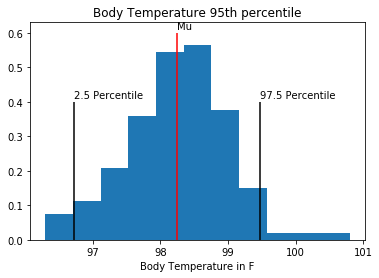

In [12]:
low_end_95, high_end_95 = conf_int_95

# Plot a histogram with the data alongside it's confidence intervals.
_ = plt.hist(df.temperature, bins=11, normed=True)
_ = plt.xlabel('Body Temperature in F')
_ = plt.title('Body Temperature 95th percentile')
_ = plt.margins(0.05)

# Vertical Lines
_ = plt.vlines(body_temp_mean, 0, .6, colors='red')
_ = plt.text(body_temp_mean, 0.61, 'Mu')
_ = plt.vlines(low_end_95, 0, .4) # 95th percentile, low end
_ = plt.text(low_end_95, 0.41, '2.5 Percentile')
_ = plt.vlines(high_end_95, 0, .4) # 95th percentile, high end
_ = plt.text(high_end_95, 0.41, '97.5 Percentile')


plt.show()
plt.clf()

In [13]:
print(low_end_95)

96.7225


In [14]:
print(high_end_95)

99.4775


### 6. Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
* Write a story with your conclusion in the context of the original problem.

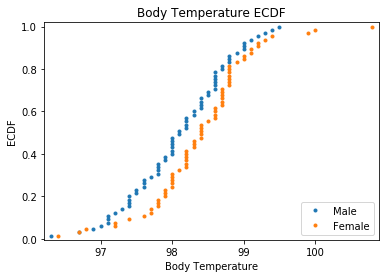

In [15]:
# use permutation to calculate if there is a difference between 
# males and females.

# Separate observations by gender
males = df[df.gender == 'M']
females = df[df.gender == 'F']


# Compute ECDF for Males and Females
x_male, y_male = ecdf(males.temperature)
x_female, y_female = ecdf(females.temperature)

# Plot each gender's ecdf on the same graph
_ = plt.plot(x_male, y_male, marker='.', linestyle='none') # Male ECDF
_ = plt.plot(x_female, y_female, marker='.', linestyle='none') # Female ECDF

# Labels
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('ECDF')
_ = plt.title('Body Temperature ECDF')
_ = plt.legend(['Male', 'Female'], loc='lower right')
plt.margins(0.02)

# Plot
plt.show()
plt.clf()

Looking at the graphical representation of each gender's body temperature, on average, males tend to have a slightly lower body temperature compared to females. Let's look for the P-value of the two samples in order to be sure.

The null hyphotesis in this case is that males and females have identical body temperatures.

In [16]:
n_trials = 1000
m_temp_means, f_temp_means = np.empty(n_trials), np.empty(n_trials)

In [17]:
m_temps = df[df['gender']=='M']['temperature']
f_temps = df[df['gender']=='F']['temperature']

In [18]:
for i in range(n_trials):
    m_temp_means[i] = np.mean(np.random.choice(m_temps, len(m_temps)))
    f_temp_means[i] = np.mean(np.random.choice(f_temps,len(f_temps)))

In [19]:
pvalue = stats.ttest_ind(m_temp_means, f_temp_means)[1]
print('P-Value:', pvalue)

P-Value: 0.0


P-value is 0.0, which means we can reject the null hypothesis stating that male and female body temperatures are equal on average.